![](insert_2_mysql_continous_data.PNG)

[YouTube Video Tutorial](https://youtu.be/Mz2KxpnPfMI)

## Create a database a table in MySQL

CREATE DATABASE mulesoft;

USE mulesoft;

CREATE TABLE Persons (
    PersonID int,
    
    LastName varchar(255),
    
    FirstName varchar(255),
    
    Address varchar(255),
    
    City varchar(255)
);



### SQL query string

INSERT INTO Persons (PersonID,LastName, FirstName, Address, City)

VALUES (:PersonID, :LastName, :FirstName, :Address, :City)


### Input parameters

{"PersonID":payload.PersonID,

 "LastName":payload.LastName,
 
 "FirstName":payload.FirstName,
 
 "Address": payload.Address,
 
 "City":payload.City}

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import time
from datetime import datetime
import pymysql
def generate_random(size):
       return ''.join(random.choice(string.ascii_letters) for x in range(size))

In [5]:
num_rows = 10
num_characters = 4
PersonID =  np.random.randint(low = 0, high = 200000, size=10)
LastName =  [generate_random(num_characters) for x in range(num_rows)]
FirstName = [generate_random(num_characters) for x in range(num_rows)]
Address =   [generate_random(num_characters) for x in range(num_rows)]
City =     [generate_random(num_characters) for x in range(num_rows)]
df = pd.DataFrame({'PersonID':PersonID, 'LastName':LastName, 'FirstName':FirstName, 'Address':Address, 'City':City})
df

,PersonID,LastName,FirstName,Address,City
0,80352,ZibI,xpwo,fIyw,fEiY
1,110364,tZxA,UoUa,rDAS,PgPb
2,142463,YEJx,eOkD,CAoi,xXgp
3,137163,sqBr,McQh,iwtq,nKwA
4,161287,enTn,GEPi,Btsy,ZJmw
5,20635,zjHh,Duwj,qRcw,yrWg
6,156193,uSIi,offK,VvUA,TbMj
7,160445,whlI,LUlB,vKVu,uTPN
8,39257,KIaM,LEkI,MIsi,dMyp
9,22778,OJYo,xBxi,JOYQ,bLNF


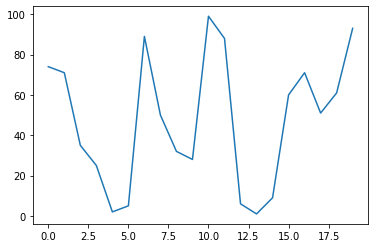

In [6]:
plt.plot(np.random.randint(low = 0, high = 100, size = 20))
plt.show()

## Continuously genetate and save csv file and png plot evey second

In [ ]:
num_rows = 10
num_characters = 4
while True:
    PersonID =  np.random.randint(200000, size=10)
    LastName =  [generate_random(num_characters) for x in range(num_rows)]
    FirstName = [generate_random(num_characters) for x in range(num_rows)]
    Address =   [generate_random(num_characters) for x in range(num_rows)]
    City =     [generate_random(num_characters) for x in range(num_rows)]
    df = pd.DataFrame({'PersonID':PersonID, 'LastName':LastName, 'FirstName':FirstName, 'Address':Address, 'City':City})
    file_name = 'data/' + str(datetime.now()).replace(' ', '_').replace(":", '_')[:19]
    df.to_csv(file_name + '.csv', index = False)
    plt.plot(np.random.randint(low = 0, high = 100, size = 20))
    plt.savefig(file_name + 'png')
    time.sleep(5)

## Check data is being inserted into the database

In [6]:
host = "localhost"
port = 3306
dbname = "mulesoft"
user = "root"
password = "a1b2c3d4!"


while True:

    conn = pymysql.connect(host, user = user,port = port,
                               passwd = password, db = dbname)
    df = pd.read_sql('select current_timestamp() as time, count(*) AS count from Persons;', con = conn)
    conn.close()
    print('Number of rows: ', df['count'].tolist()[0])
    time.sleep(3)

Number of rows:  1370
Number of rows:  1378
Number of rows:  1380
Number of rows:  1390
Number of rows:  1390
Number of rows:  1400
Number of rows:  1407
Number of rows:  1410
